In [1]:
import pandas as pd
import matplotlib.pyplot as plt

cook_df = pd.read_csv('epi_r.csv')

In [2]:
from scipy import stats
lib = {}
for col in cook_df.columns[6:]:
    if(stats.ttest_ind(cook_df['rating'],cook_df.loc[cook_df[col] == 1]['rating']).pvalue < .001):
        lib.update({col: len(cook_df.loc[cook_df[col] == 1])})
lib_sorted = [(k, lib[k]) for k in sorted(lib, key=lib.get, reverse=True)]
lib_sorted

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[('bon appétit', 9355),
 ('peanut free', 8390),
 ('soy free', 8088),
 ('tree nut free', 7044),
 ('vegetarian', 6846),
 ('gourmet', 6648),
 ('kosher', 6175),
 ('pescatarian', 6042),
 ('quick & easy', 5372),
 ('wheat/gluten-free', 4906),
 ('bake', 4413),
 ('no sugar added', 3132),
 ('winter', 3099),
 ('fall', 3015),
 ('dinner', 2705),
 ('sugar conscious', 2466),
 ('onion', 2238),
 ('tomato', 2140),
 ('vegetable', 2087),
 ('sauté', 2044),
 ('milk/cream', 1995),
 ('fruit', 1958),
 ('vegan', 1851),
 ('kid-friendly', 1791),
 ('herb', 1681),
 ('garlic', 1643),
 ('dairy', 1496),
 ('thanksgiving', 1458),
 ('appetizer', 1372),
 ('cheese', 1355),
 ('chicken', 1344),
 ('roast', 1320),
 ('soup/stew', 1164),
 ('cocktail party', 1154),
 ('potato', 1128),
 ('grill/barbecue', 1104),
 ('drink', 1087),
 ('sauce', 1065),
 ('low cal', 1049),
 ('christmas', 1039),
 ('high fiber', 1013),
 ('food processor', 973),
 ('pasta', 968),
 ('backyard bbq', 938),
 ('fish', 936),
 ('pork', 928),
 ('leafy green', 903),


In [3]:
columns = ['calories', 'protein', 'fat', 'sodium']
for i in range(26):
    columns.append(lib_sorted[i][0])
columns

['calories',
 'protein',
 'fat',
 'sodium',
 'bon appétit',
 'peanut free',
 'soy free',
 'tree nut free',
 'vegetarian',
 'gourmet',
 'kosher',
 'pescatarian',
 'quick & easy',
 'wheat/gluten-free',
 'bake',
 'no sugar added',
 'winter',
 'fall',
 'dinner',
 'sugar conscious',
 'onion',
 'tomato',
 'vegetable',
 'sauté',
 'milk/cream',
 'fruit',
 'vegan',
 'kid-friendly',
 'herb',
 'garlic']

In [4]:
print(100*cook_df.isnull().sum()/cook_df.isnull().count())
for col in columns:
    cook_df = cook_df.loc[cook_df[col].notnull()]
print(100*cook_df.isnull().sum()/cook_df.isnull().count())

title                     0.000000
rating                    0.000000
calories                 20.531618
protein                  20.756034
fat                      20.860762
sodium                   20.541592
#cakeweek                 0.000000
#wasteless                0.000000
22-minute meals           0.000000
3-ingredient recipes      0.000000
30 days of groceries      0.000000
advance prep required     0.000000
alabama                   0.000000
alaska                    0.000000
alcoholic                 0.000000
almond                    0.000000
amaretto                  0.000000
anchovy                   0.000000
anise                     0.000000
anniversary               0.000000
anthony bourdain          0.000000
aperitif                  0.000000
appetizer                 0.000000
apple                     0.000000
apple juice               0.000000
apricot                   0.000000
arizona                   0.000000
artichoke                 0.000000
arugula             

In [5]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
svr = SVC()
X = cook_df[columns]
Y = []
for val in cook_df['rating']:
    if(val > 2.5):
        Y.append(1)
    else:
        Y.append(0)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [6]:
svr.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

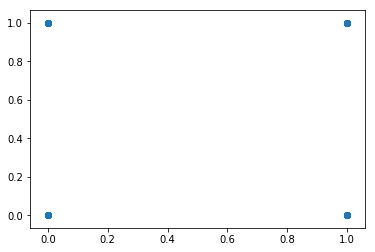

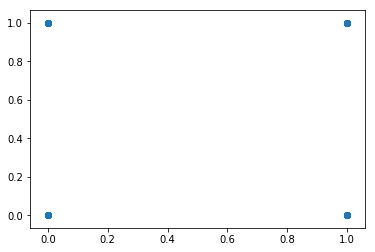

In [7]:
import matplotlib.pyplot as plt

plt.scatter(y_train, svr.predict(X_train))
plt.show()
plt.scatter(y_test, svr.predict(X_test))
plt.show()


In [8]:
print(svr.score(X_train, y_train))
print(svr.score(X_test, y_test))

0.9609959814041447
0.8909549322407816


In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X, Y, cv=5)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
